In [ ]:
# default_exp multi_armed_bandits

# multi_armed_bandits

> module for generating bandit responses

In [ ]:
#hide
from nbdev.showdoc import *

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [ ]:
#export
import numpy as np
import scipy.stats as stats



In [ ]:
theta = [0.1, 0.9]
theta_contextual = [1.6, 0.4]
noise = 0.1
num_data = 1000
X = np.linspace(-6, 6, num_data)


## Categorical Features

### noncontextual

In [ ]:
#export
def non_contextual_categorical_bandit(choice:int, theta:np.array)->bool:

    # draw a number between 0 and 1, if it's smaller than the theta, return reward
    if np.random.random() < theta[choice]:
        reaction = True
    else:
        reaction = False

    return reaction

In [ ]:
y0 = [non_contextual_categorical_bandit(0,theta) for i in range(100)]
y1 = [non_contextual_categorical_bandit(1,theta) for i in range(100)]


np.mean(y0), np.mean(y1)

(0.09, 0.9)

In [ ]:
assert non_contextual_categorical_bandit(1,theta) in [True, False]

### contextual

In [ ]:
#export
def contextual_categorical_bandit(context:np.array, choice:int, theta:np.array, noise:float):

    y = theta[choice] * context
    p = 1/(1+np.exp(-y))

    return np.random.choice([0,1],p=[1-p,p]), max(theta) - p, p

def contextual_categorical_get_optimal_arm(context):
    if context < 0:
        return 1
    return 0

In [ ]:
contextual_categorical_bandit(context = 10, choice = 1, theta = theta, noise = noise)

(1, -0.09987660542401366, 0.9998766054240137)

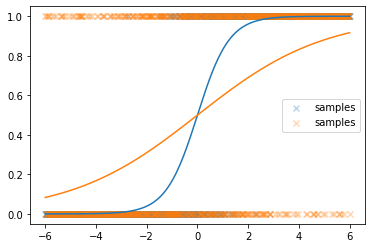

In [ ]:
for arm in [0,1]:
    y = []
    p1s = []
    p2s= []
    optimal_y = []
    for i in range(num_data):
        outcome, p1, p2 = contextual_categorical_bandit(X[i],arm,theta_contextual,noise)
        p1s.append(p1)
        p2s.append(p2)
        y.append(outcome)

        optimal_y.append(contextual_categorical_bandit(X[i], contextual_categorical_get_optimal_arm(X[i]), theta_contextual, noise)[0])

    y = np.array(y).flatten()

    plt.scatter(X,y,alpha = 0.3, marker= 'x', label = 'samples',)

    plt.legend()
    plt.plot(X,p2s)

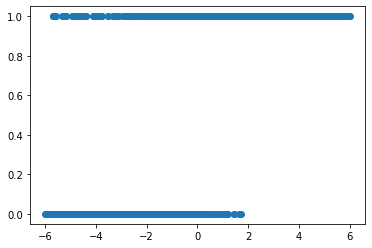

In [ ]:
plt.scatter(X, optimal_y)

## numerical


### contextual

In [ ]:
#export
def contextual_numerical_bandit(context:np.array, choice:int, theta:np.array, noise=float)->float:
    features  = np.append(context,choice)

    # decide on which slope to use depending on whether a dog is present or not
    m = theta[0] if features[1] else theta[1]
    intercept = 0 if features[1] else 0

    # $y = x \cdot m + t + \epsilon $
    y = features[0] * m + intercept +  np.random.normal(0,noise)


    return y

In [ ]:
contextual_numerical_customer_reaction(np.array([1]),1,theta,noise)

In [ ]:
X = np.linspace(-10,10, num_data)
y0 = [contextual_numerical_customer_reaction(x,0,theta,0.1) for x in X]
y1 = [contextual_numerical_customer_reaction(x,1,theta,0.1) for x in X]

plt.scatter(X,y1)
plt.scatter(X,y0)


In [ ]:
np.mean(y1), np.mean(y0)